- made from template of CNN Genre Classifier
- interpretation done by my own accord

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 233ms/step - accuracy: 0.1671 - loss: 2.2536 - val_accuracy: 0.3113 - val_loss: 2.0619
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 72s 176ms/step - accuracy: 0.2898 - loss: 2.0237 - val_accuracy: 0.3707 - val_loss: 1.8134
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.3760 - loss: 1.7939 - val_accuracy: 0.4353 - val_loss: 1.6391
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.4080 - loss: 1.6692 - val_accuracy: 0.4927 - val_loss: 1.5152
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.4603 - loss: 1.5476 - val_accuracy: 0.5093 - val_loss: 1.4313
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.4894 - loss: 1.4645 - val_accuracy: 0.5207 - val_loss: 1.3753
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.5022 - loss: 1.4059 - val_accuracy: 0.5260 - val_loss: 1.3450
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.5237 - loss: 1.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 130, 64)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,408 (677.38 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 115,606 (451.59 KB)

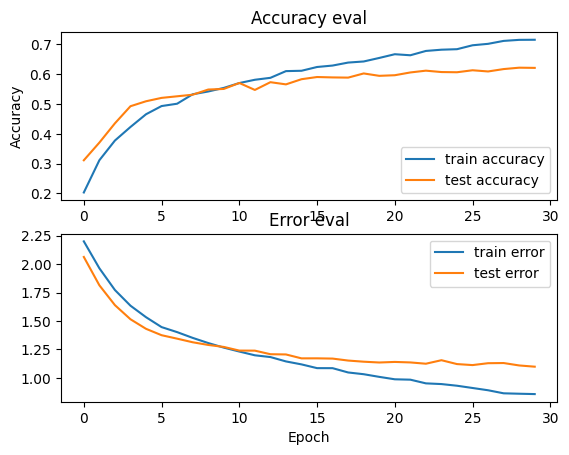

In [11]:
import json
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    return inputs, targets

def load_genres(dataset_path=DATASET_PATH):
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    genres = np.array(data["mapping"])
    return genres

def prepare_datasets(test_size, validation_size):

    # load data
    inputs, targets = load_data(DATASET_PATH)
    
    # create train/test split 
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=test_size)

    # create the train/validation split
    inputs_train, inputs_validation, targets_train, targets_validation = train_test_split(inputs_train, targets_train, test_size=validation_size)

    return inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test


def build_model(input_shape):

    """Generates RNN-LSTM model
    param:
        input_shape (tuple): shape of input set 
    return: model (RNN-LSTM) model"""

    # create model 
    model = keras.Sequential()
    
    # build 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True)) # sequence to sequence layer
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model
    
def predict(model, inputs, targets):

    with open(DATASET_PATH, "r") as fp: 
        data = json.load(fp)

    genres = np.array(data["mapping"])
    
    # inputs -> 3d array: (130, 13, 1)
    inputs = inputs[np.newaxis, ...] # model expects 4d array, 4th dimention is no. of samples -> (1, 130, 13, 1)

    # prediction = [[0.1, 0.2, ....]] -> 10 values, indicating different probabilities for different genres
    prediction = model.predict(inputs) 

    # get the index with max value
    predicted_index = np.argmax(prediction, axis=1) 

    #predicted_genre = genres[predicted_index]

    #expected_genre = data.get("Mapping", targets)
    print("Expected index: {}, Predicted index:{}".format(targets, predicted_index))
    print("Expected genre: {}, Predicted genre:{}".format(genres[targets], genres[predicted_index]))

def plot_history(history):
    fig, axs = plt.subplots(2) 

    # create accuracy subplot 
    axs[0].plot(history.history["accuracy"], label="train accuracy") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error") # the accuracy of the train set is stored in a dict called history and the key is history
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
if __name__ == "__main__":
    # create train, validation, and test sets
    inputs_train, inputs_validation, inputs_test, targets_train, targets_validation, targets_test = prepare_datasets(0.25, 0.2)

    # create the network 
    input_shape = (inputs_train.shape[1], inputs_train.shape[2]) # [130, 13]
    model = build_model(input_shape)


    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


    # train the RNN-LSTM model 
    history = model.fit(inputs_train, targets_train,
                  validation_data=(inputs_validation, targets_validation),
                  batch_size=32, epochs=30)

    # evaluate the RNN-LSTM model on the test set
    test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    # make predictions on a sample (inference)
    inputs = inputs_test[100]
    targets = targets_test[100]
    
    predict(model, inputs, targets)


    model.summary()
    
    
    # plot accuracy/error for training and validation
    plot_history(history)
    

### Interpretation
Epoch 11/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - accuracy: 0.5709 - loss: 1.2227 - val_accuracy: 0.5707 - val_loss: 1.2403

That is the point of highest accuracy